In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
#import tensorflow as tf

df = pd.read_csv('bank-additional-full.csv', sep=';')
df = df.drop(['duration'], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


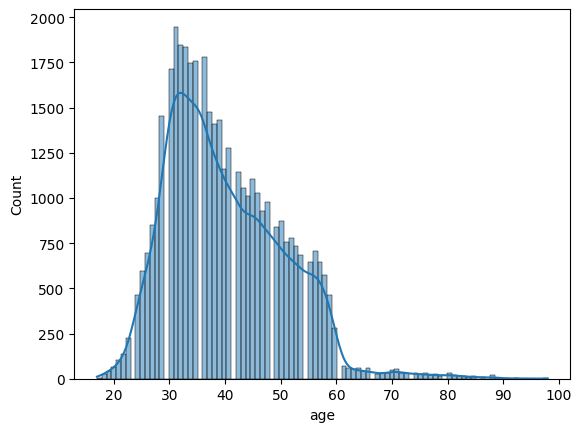

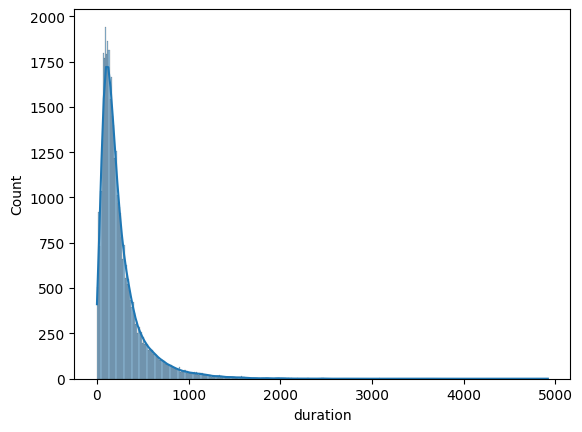

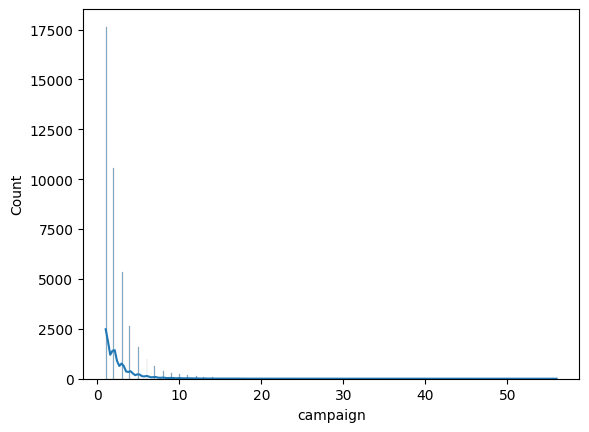

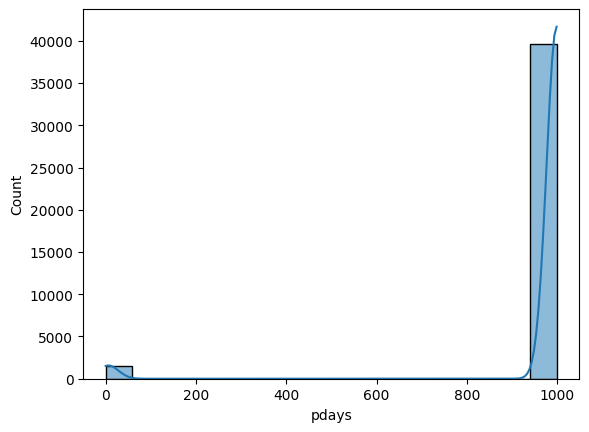

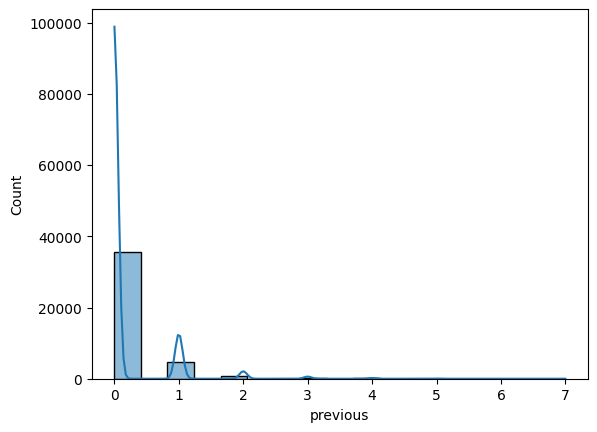

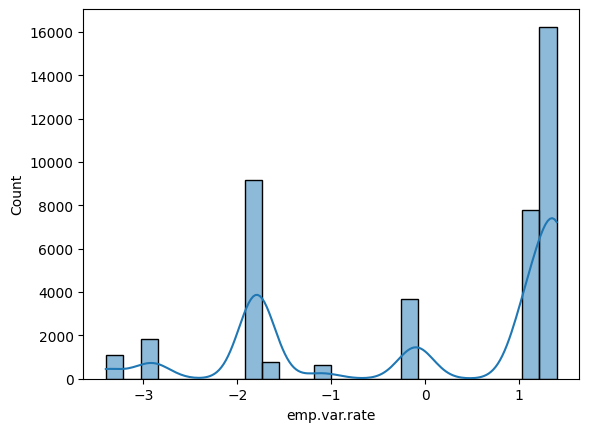

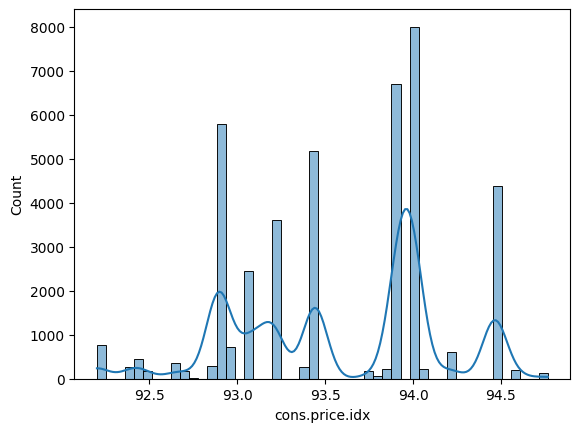

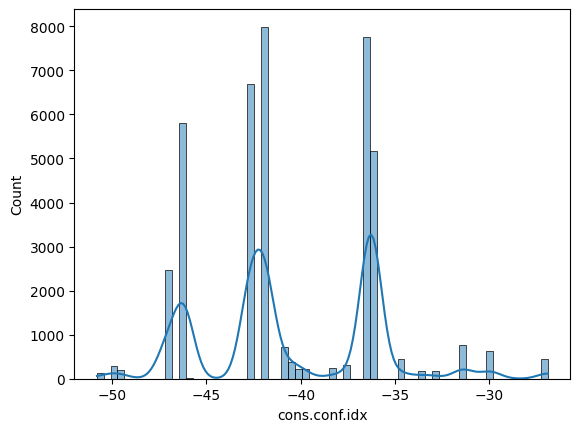

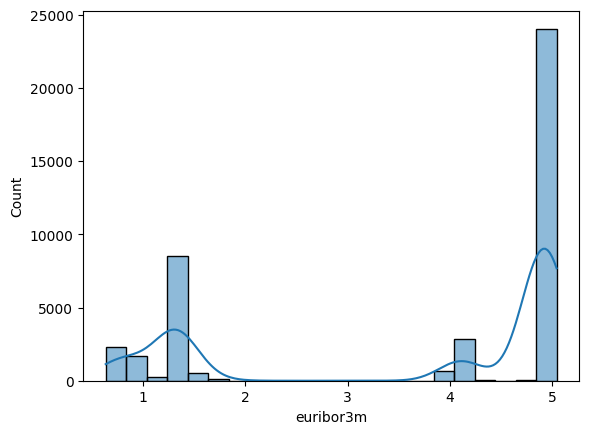

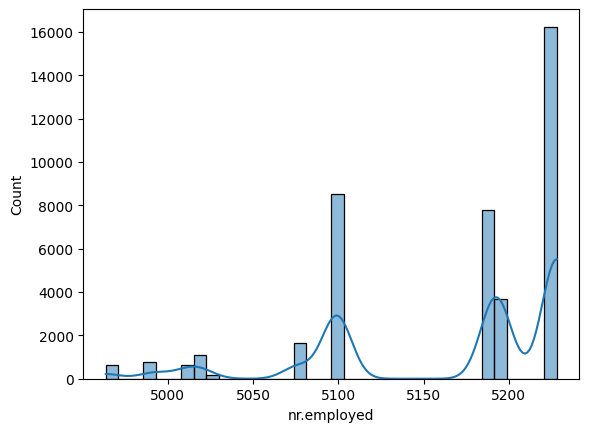

In [3]:
cols = df.columns
num_data = list(df._get_numeric_data().columns)
cat_data = list(set(cols) - set(num_data))
for i in num_data:
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

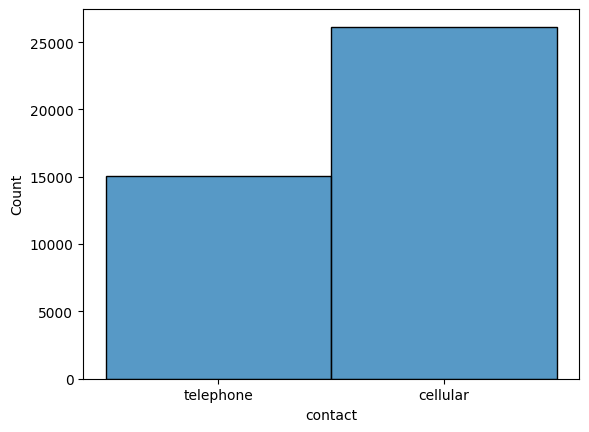

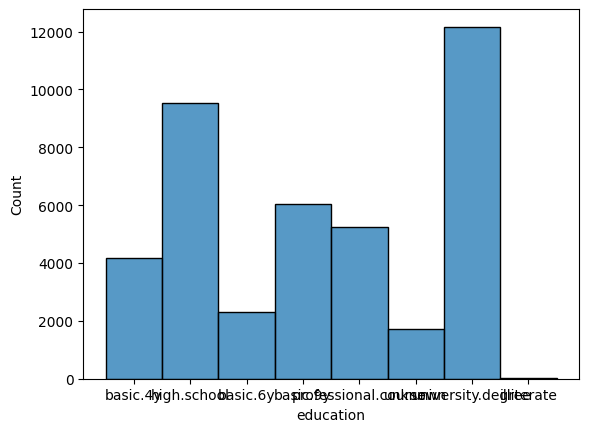

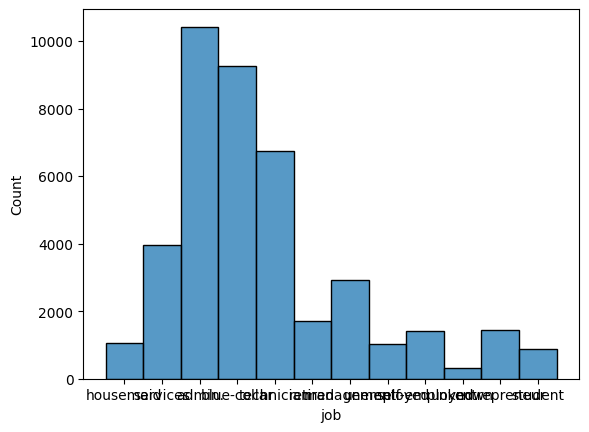

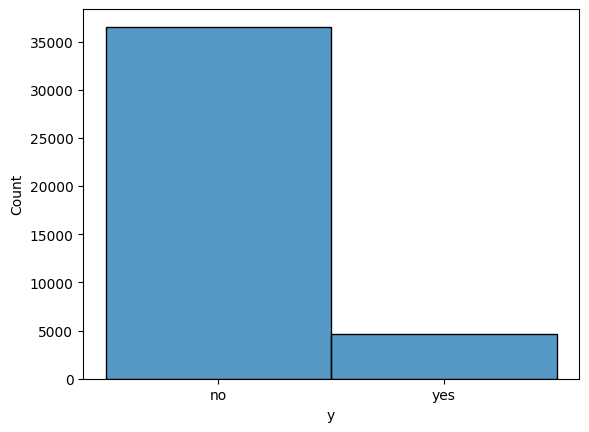

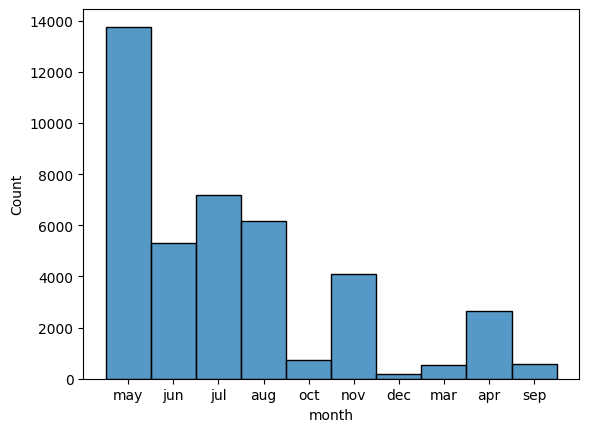

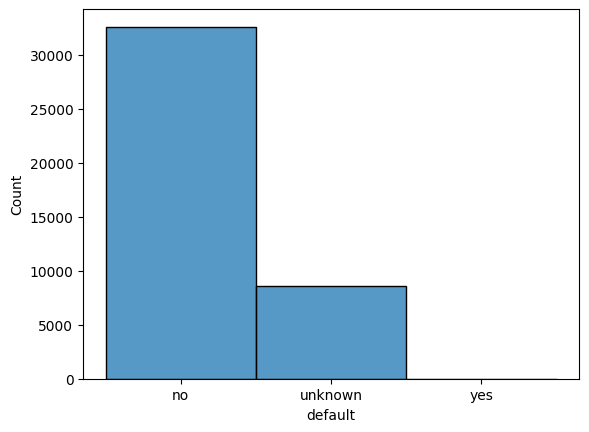

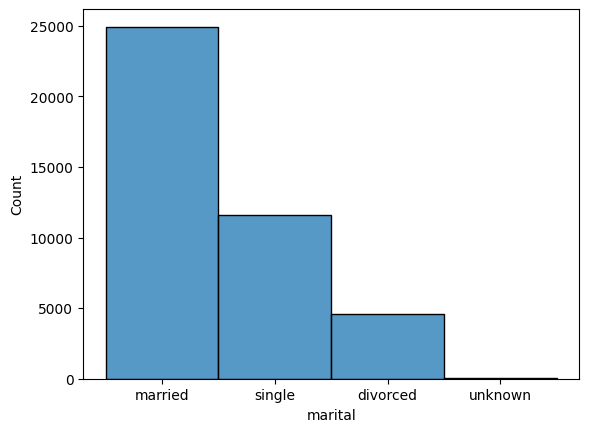

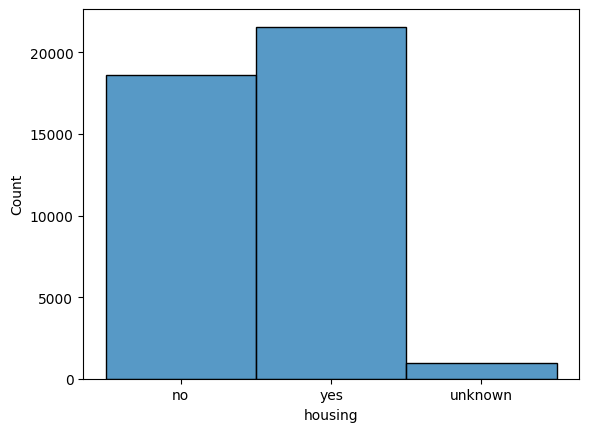

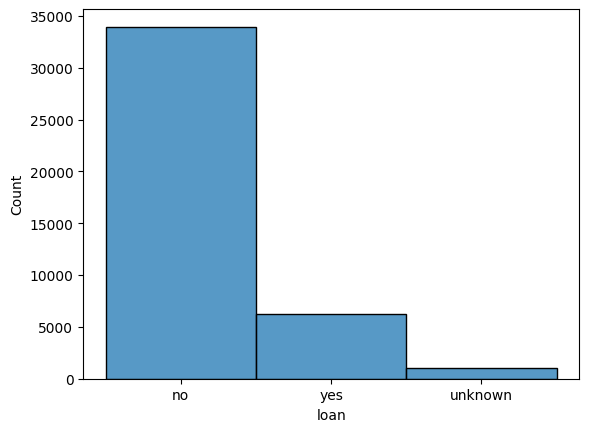

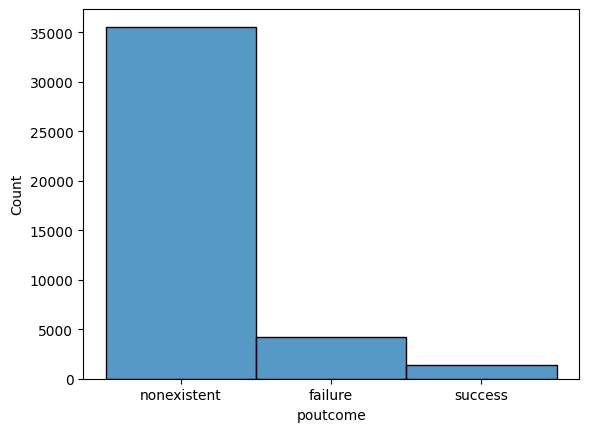

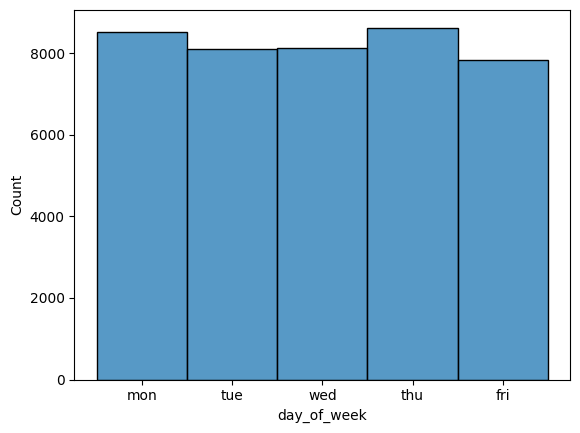

In [4]:
for i in cat_data:
    sns.histplot(data = df, x = i, kde = False)
    plt.show()

In [ ]:
df['y'].value_counts()

In [ ]:
df['y'] = df['y'].replace(['no', 'yes'], [0, 1])
plt.figure(figsize = (16,9))
sns.heatmap(round(df.corr(),2),annot=True)
plt.show()